In [4]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 

In [5]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

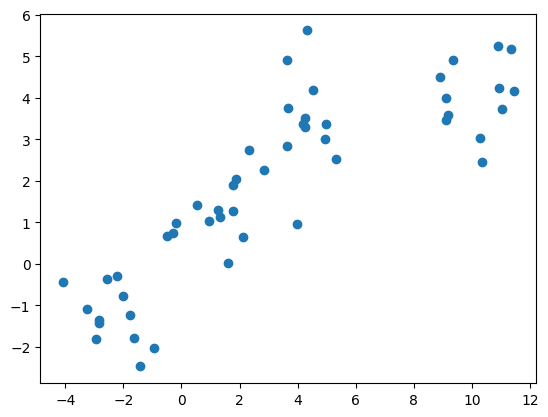

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [32]:
agglom = AgglomerativeClustering(n_clusters =6, linkage = 'average' )

In [33]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=6)

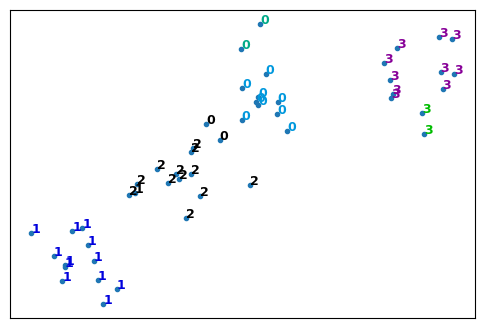

In [34]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [16]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.09105676 0.18457967 ... 0.45696301 0.13251054 0.12795728]
 [0.09105676 0.         0.0966284  ... 0.39405516 0.18961574 0.20784603]
 [0.18457967 0.0966284  0.         ... 0.37527292 0.28291381 0.30446392]
 ...
 [0.45696301 0.39405516 0.37527292 ... 0.         0.43638311 0.49684677]
 [0.13251054 0.18961574 0.28291381 ... 0.43638311 0.         0.0630435 ]
 [0.12795728 0.20784603 0.30446392 ... 0.49684677 0.0630435  0.        ]]


In [28]:
Z = hierarchy.linkage(dist_matrix, 'centroid')

C:\Users\barsam\AppData\Local\Temp\ipykernel_12784\3158491876.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'centroid')


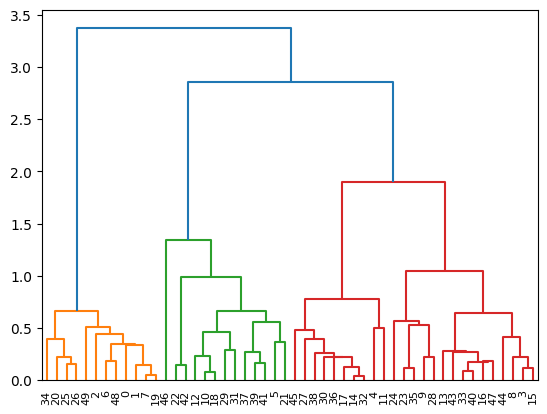

In [29]:
dendro = hierarchy.dendrogram(Z)